In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def danhilepski(A):
    v=[]
    n,_=A.shape
    i=n-1
    m=n-1
    back=np.eye(n)
    while i>0:
        if A[i,i-1]!=0:
            M=np.eye(n)
            M[i-1,:]=A[i,:]
            M1=np.eye(n)
            M1[i-1,:]=-A[i,:]/A[i,i-1]
            M1[i-1,i-1]=1/A[i,i-1]
            back=back@M1
            A=M@A@M1
            
        else:
            non=False
            for j in range(i-1):                
                if A[i,j]!=0:
                    tempt=A[i-1,:]
                    A[i-1,:]=A[j,:]
                    A[j,:]=tempt
                    tempt=A[:,i-1]
                    A[:,i-1]=A[:,j]
                    A[:,j]=tempt
                    tempt=back[:,i-1]
                    back[:,i-1]=back[:,j]
                    back[:,j]=tempt
                    non=True
                    i+=1
                    break
            
            if non == False:
                for j in range(i,m):
                    M = np.eye(m+1)
                    M[:i, j+1] = -A[:i, j]
                    M1 = np.eye(m+1);
                    M1[:i, j+1] = A[:i, j]
                    A = M@A@M1
                    back = back@M1
          
                tt = False
                for j in range(i-1,-1,-1):               
                    if A[j, m] != 0:
                        M = np.eye(m+1)
                        x = M[i:m+1, :]
                        y = M[i-1, :]
                        M = np.vstack((M[:i-1, :], x, y))
                        M1 = M.T
                        A = M@A@M1
                        back = back@M1
                        i = m+1
                        tt = True
                        break
                if tt == False:
                    X = A[i:m+1, i:m+1]
                    k,_ = X.shape
                    v = findvalue(X)      
                    m = i-1
                    A = A[:m+1, :m+1]
                    back = eye(m+1)
            
                
        i-=1
    p=findvalue(A)
    u=np.eye(n)
    for i in range(n):
        gt=1
        y=[1]
        for j in range(n-1):
            gt=gt*p[i]
            y.append(gt)
        y.reverse()
        y=np.array(y).reshape(-1,1)
        y=back@y
        y=y/sumsquare(y)
        u[:,i]=y.reshape(-1)    
        
        
    return A,p,u
    
def findvalue(A):
    p=-A[0,:]
    u=np.hstack((1,p))
    u=np.roots(u)
    return u
def sumsquare(y):
    tong=0
    for i in range(len(y)):
        tong+=y[i]**2
    return np.sqrt(tong)
def SVD(A):
    _,p,v=danhilepski(A.T@A)
    m,n=A.shape
    U=np.eye(m)
    sigma=np.zeros((m,n))
    V=np.eye(n)
    for i in range(len(v)):
        if i==0:
            V[:,i]=-v[:,i]
        else :         
            V[:,i]=v[:,i]
    for i in range(len(v)):
        U[i,:]=(A@V[:,i])/(np.sqrt(p[i]))
    for i in range(len(p)):
        sigma[i,i]=np.sqrt(p[i])
    with open(outputfile_name,'w') as f:
        f.write('U = ')
        np.savetxt(outputfile_name,U)
        f.write('\n')
        f.write('Sigma = ')
        np.savetxt(outputfile_name,sigma)
        f.write('\n')
        f.write('V.T = ')
        np.savetxt(outputfile_name,V)
        f.close()
    return U,sigma,V
                    
    
    

In [9]:
image=cv2.imread("Image/Le_Thanh_Vinh.jpg")

In [12]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

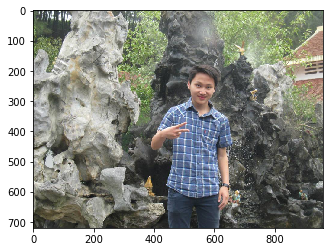

In [13]:
plt.imshow(image)

In [19]:
m,n=image[:,:,0].shape

In [20]:
m

720

In [22]:
U_R,S_R,V_R=np.linalg.svd(image[:,:,0])
U_G,S_G,V_G=np.linalg.svd(image[:,:,1])
U_B,S_B,V_B=np.linalg.svd(image[:,:,2])

In [23]:
temp1=np.zeros((m,n))
temp2=np.zeros((m,n))
temp3=np.zeros((m,n))
for i in range(min(m,n)):
    temp1[i][i]=S_R[i]
    temp2[i][i]=S_G[i]
    temp3[i][i]=S_B[i]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


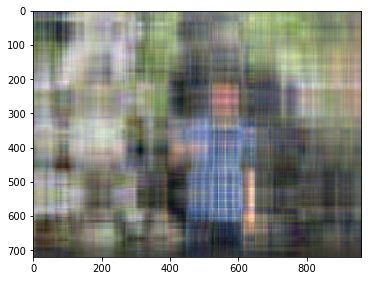

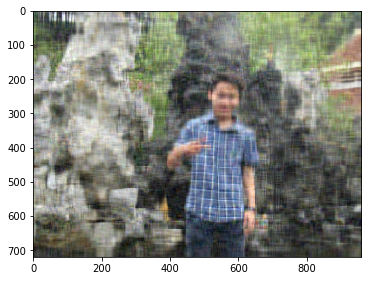

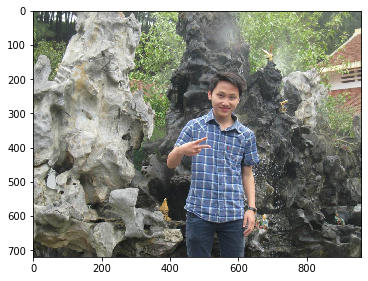

In [31]:

error=[]
index=1
for i in [5,25,300]:
    C_R=np.copy(temp1)
    U_R_copy=np.copy(U_R)
    V_R_copy=np.copy(V_R)
    C_R[i+1:,:]=0
    U_R_copy[:,i+1:]=0
    V_R_copy[i+1:,:]=0
    red=U_R_copy@C_R@V_R_copy
    C_G=np.copy(temp2)
    U_G_copy=np.copy(U_G)
    V_G_copy=np.copy(V_G)
    C_G[i+1:,:]=0
    U_G_copy[:,i+1:]=0
    V_G_copy[i+1:,:]=0
    green=U_G_copy@C_G@V_G_copy
    C_B=np.copy(temp3)
    U_B_copy=np.copy(U_B)
    V_B_copy=np.copy(V_B)
    C_B[i+1:,:]=0
    U_B_copy[:,i+1:]=0
    V_B_copy[i+1:,:]=0
    blue=U_B_copy@C_B@V_B_copy
    lower_resolution=np.zeros(image.shape)
    lower_resolution[:,:,0]=red/255
    
    lower_resolution[:,:,1]=green/255
    lower_resolution[:,:,2]=blue/255
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,index)
    plt.imshow(lower_resolution)
    cv2.imwrite("output_{}.jpg".format(i),lower_resolution)
    error
    index+=1
    